In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random


In [28]:
users = [101, 102, 103, 104, 105,]
coins = ["BTC","ETH","XRP","LTC","ADA"]

data = []
start_time = datetime(2025, 8, 20, 9, 0, 0)


In [ ]:
for i in range(100):
    transaction_id = i + 1
    user_id = random.choice(users)
    coin = random.choice(coins)
    price = round(random.uniform(10000, 700000), 2)  
    amount = round(random.uniform(0.01, 2), 4)       
    timestamp = start_time + timedelta(minutes=i*10)
    
    data.append([transaction_id, user_id, coin, price, amount, timestamp])

In [ ]:
df = pd.DataFrame(data, columns=["transaction_id", "user_id", "coin", "price", "amount", "timestamp"])

df.to_csv("transactions.csv", index=False)

print("Örnek veri oluşturuldu ve transactions.csv dosyasına kaydedildi.")
print(df.head())

Örnek veri oluşturuldu ve transactions.csv dosyasına kaydedildi.
   transaction_id  user_id coin      price  amount           timestamp
0               1      101  XRP  295826.94  0.0467 2025-08-20 09:00:00
1               2      105  ADA   11515.60  0.4149 2025-08-20 09:10:00
2               3      102  ADA  237826.27  0.9146 2025-08-20 09:20:00
3               4      105  ADA  282240.72  0.4273 2025-08-20 09:30:00
4               5      104  ETH  266657.48  1.3590 2025-08-20 09:40:00


In [35]:
df = pd.read_csv("transactions.csv")

df["timestamp"] = pd.to_datetime(df["timestamp"])

print("İlk 5 satır:")
print(df.head())


İlk 5 satır:
   transaction_id  user_id coin      price  amount           timestamp
0               1      101  XRP  295826.94  0.0467 2025-08-20 09:00:00
1               2      105  ADA   11515.60  0.4149 2025-08-20 09:10:00
2               3      102  ADA  237826.27  0.9146 2025-08-20 09:20:00
3               4      105  ADA  282240.72  0.4273 2025-08-20 09:30:00
4               5      104  ETH  266657.48  1.3590 2025-08-20 09:40:00


In [ ]:
df["total_value"] = df["price"] * df["amount"]
total_volume = df["total_value"].sum()
print("\nToplam İşlem Hacmi:", round(total_volume, 2))

#  Ortalama fiyat
avg_price = df["price"].mean()
print("Ortalama Fiyat:", round(avg_price, 2))

#Coin bazında toplam işlem hacmi
coin_volume = df.groupby("coin")["total_value"].sum()
print("\nCoin Bazında Toplam İşlem Hacmi:")
print(coin_volume)

# Kullanıcı bazında işlem sayısı
user_transactions = df["user_id"].value_counts()
print("\nKullanıcı Bazında İşlem Sayısı:")
print(user_transactions)


Toplam İşlem Hacmi: 112438621.74
Ortalama Fiyat: 360096.83

Coin Bazında Toplam İşlem Hacmi:
coin
ADA    2.621181e+07
BTC    1.718466e+07
ETH    2.012776e+07
LTC    2.229222e+07
XRP    2.662218e+07
Name: total_value, dtype: float64

Kullanıcı Bazında İşlem Sayısı:
user_id
105    70
101    65
102    58
104    57
103    50
Name: count, dtype: int64


C:\Users\ceren\AppData\Local\Temp\ipykernel_2028\3922832354.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coin_volume.index, y=coin_volume.values, palette="viridis")


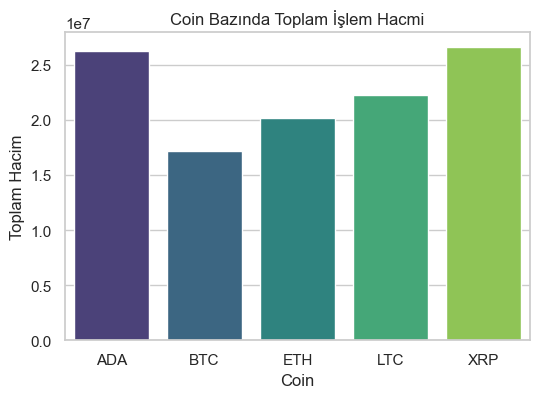

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("transactions.csv")
df["timestamp"] = pd.to_datetime(df["timestamp"])
df["total_value"] = df["price"] * df["amount"]


sns.set(style="whitegrid")

coin_volume = df.groupby("coin")["total_value"].sum()

plt.figure(figsize=(6,4))
sns.barplot(x=coin_volume.index, y=coin_volume.values, palette="viridis")
plt.title("Coin Bazında Toplam İşlem Hacmi")
plt.ylabel("Toplam Hacim")
plt.xlabel("Coin")
plt.show()


C:\Users\ceren\AppData\Local\Temp\ipykernel_2028\3704793245.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=user_transactions.values, y=user_transactions.index, palette="coolwarm")


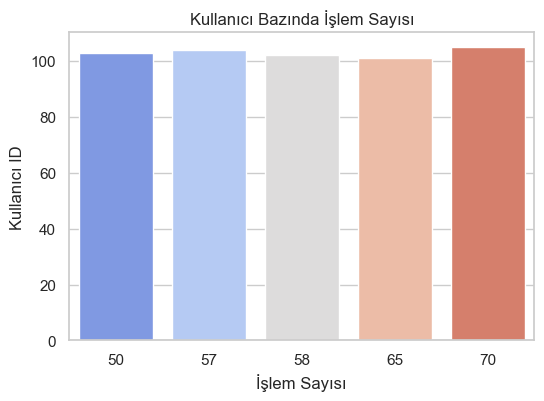

In [44]:
user_transactions = df["user_id"].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=user_transactions.values, y=user_transactions.index, palette="coolwarm")
plt.title("Kullanıcı Bazında İşlem Sayısı")
plt.xlabel("İşlem Sayısı")
plt.ylabel("Kullanıcı ID")
plt.show()



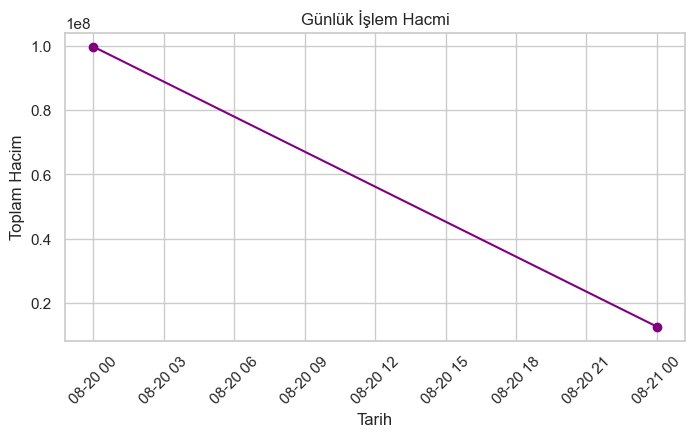

In [45]:
daily_volume = df.groupby(df["timestamp"].dt.date)["total_value"].sum()

plt.figure(figsize=(8,4))
plt.plot(daily_volume.index, daily_volume.values, marker="o", linestyle="-", color="purple")
plt.title("Günlük İşlem Hacmi")
plt.xlabel("Tarih")
plt.ylabel("Toplam Hacim")
plt.xticks(rotation=45)
plt.show()

C:\Users\ceren\AppData\Local\Temp\ipykernel_2028\3967032551.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coin_volume.index, y=coin_volume.values, palette="viridis")


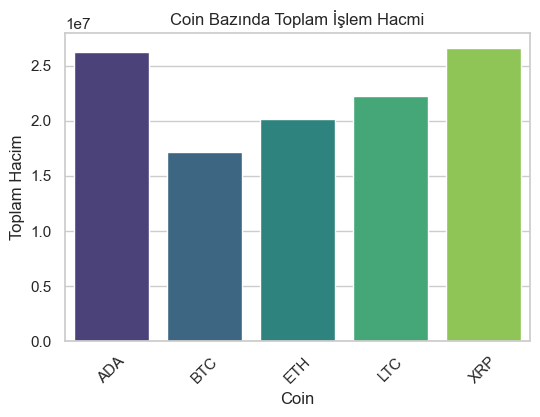

In [47]:
df = pd.read_csv("transactions.csv")
df.columns = df.columns.str.lower().str.replace(" ","_")

df["timestamp"] = pd.to_datetime(df["timestamp"])
df["total_value"] = df["price"] * df["amount"]

sns.set(style="whitegrid")

coin_volume = df.groupby("coin")["total_value"].sum()

plt.figure(figsize=(6,4))
sns.barplot(x=coin_volume.index, y=coin_volume.values, palette="viridis")
plt.title("Coin Bazında Toplam İşlem Hacmi")
plt.xlabel("Coin")
plt.ylabel("Toplam Hacim")
plt.xticks(rotation=45)
plt.show()